In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from keras.datasets import imdb
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.preprocessing import image
import numpy as np 
import matplotlib.pyplot as plt
from keras.applications import vgg16
import cv2 as cv
import xml.etree.ElementTree as ET
from os import listdir
import shutil, os
from os.path import isfile, join
import os
from PIL import Image

In [7]:
image_size =(244, 244)
batch_size = 32
seed = 142

In [12]:
#обучающий датасет и датасет валидации
train_ds = image_dataset_from_directory(directory='C:\\Users\\Matvey\\janedataset\\cars_train', validation_split=0.1, subset="training", image_size=image_size, seed =seed ,batch_size= batch_size)
valid_ds = image_dataset_from_directory(directory='C:\\Users\\Matvey\\janedataset\\cars_test', validation_split = 0.1, subset="validation", image_size=image_size, seed =seed ,batch_size= batch_size)

Found 17751 files belonging to 2 classes.
Using 15976 files for training.
Found 10041 files belonging to 2 classes.
Using 1004 files for validation.


In [29]:
test_ds = image_dataset_from_directory(directory='test_set', image_size=image_size, seed =seed ,batch_size= batch_size)

Found 4070 files belonging to 2 classes.


In [14]:
#Оптимизацияя (Используем ЦП для подгрузки изображений)
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.prefetch(buffer_size=AUTOTUNE)
#test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [22]:
model = keras.Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(244, 244, 3), padding="SAME"),  # свёрточный слой
    MaxPooling2D((2, 2), strides=2),  # уменьшение карт признаков
    #Dropout(0.2),  # отключение 20 процентов нейронов

    Conv2D(128, (3, 3), activation='relu', padding="SAME"),  # свёрточный слой
    MaxPooling2D((2, 2), strides=2),  # уменьшение карт признаков
    Dropout(0.2),  # отключение 20 процентов нейронов

    Conv2D(256, (3, 3), activation='relu', padding="SAME"),  # свёрточный слой
    Conv2D(256, (3, 3), activation='relu', padding="SAME"),  # свёрточный слой
    MaxPooling2D((2, 2), strides=2),  # уменьшение карт признаков
    #Dropout(0.2),  # отключение 20 процентов нейронов

    Conv2D(512, (3, 3), activation='relu', padding="SAME"),  # свёрточный слой
    Conv2D(512, (3, 3), activation='relu', padding="SAME"),  # свёрточный слой
    MaxPooling2D((2, 2), strides=2),  # уменьшеи карт признаков
    #Dropout(0.2),  # отключение 20 процентов нейронов

    Conv2D(512, (3, 3), activation='relu', padding="SAME"),  # свёрточный слой
    Conv2D(512, (3, 3), activation='relu', padding="SAME"),  # свёрточный слой
    MaxPooling2D((2, 2), strides=2),  # уменьшение карт признаков
    #Dropout(0.2),  # отключение 20 процентов нейронов

    #Conv2D(512, (3, 3), activation='relu'),  # свёрточный слой
    #MaxPooling2D((2, 2), strides=2),  # уменьшение карт признаков
    #Dropout(0.2),  # отключение 20 процентов нейронов

    Flatten(),
    Dense(512, activation='relu'),  # обычные нейроны
    Dropout(0.2),  # отключение 20 процентов нейронов
    Dense(256, activation='relu'),  # обычные нейроны
    Dropout(0.2),  # отключение 20 процентов нейронов
    Dense(128, activation='relu'),  # обычные нейроны
    Dropout(0.2),  # отключение 20 процентов нейронов
    Dense(1, activation='sigmoid'),  # выходной слой
])


In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
his = model.fit(train_ds, validation_data = valid_ds, epochs=30,  batch_size=batch_size)

Epoch 1/30
500/500 [==============================] - 111s 221ms/step - loss: 0.9262 - accuracy: 0.5360 - val_loss: 0.7279 - val_accuracy: 0.1942
Epoch 2/30
500/500 [==============================] - 117s 233ms/step - loss: 0.7049 - accuracy: 0.5479 - val_loss: 0.7645 - val_accuracy: 0.1942
Epoch 3/30
500/500 [==============================] - 119s 238ms/step - loss: 0.6960 - accuracy: 0.5422 - val_loss: 0.7824 - val_accuracy: 0.1942
Epoch 4/30
500/500 [==============================] - 118s 235ms/step - loss: 0.3660 - accuracy: 0.8327 - val_loss: 0.1790 - val_accuracy: 0.9402
Epoch 5/30
500/500 [==============================] - 117s 233ms/step - loss: 0.2034 - accuracy: 0.9238 - val_loss: 0.2160 - val_accuracy: 0.9263
Epoch 6/30
500/500 [==============================] - 117s 234ms/step - loss: 0.1868 - accuracy: 0.9350 - val_loss: 0.1672 - val_accuracy: 0.9442
Epoch 7/30
500/500 [==============================] - 117s 234ms/step - loss: 0.3737 - accuracy: 0.8770 - val_loss: 0.3787 -

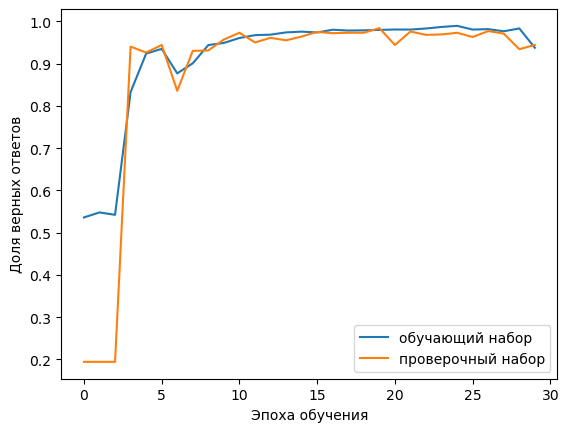

In [25]:
plt.plot(his.history['accuracy'],
         label='обучающий набор')
plt.plot(his.history['val_accuracy'],
         label='проверочный набор')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [26]:
model.save('Jane.h5')

In [32]:
model.evaluate(test_ds)

128/128 [==============================] - 10s 77ms/step - loss: 0.2396 - accuracy: 0.9268


[0.23964066803455353, 0.9267813563346863]